<h3> Importing the Data

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("WBP Staff Only HC.csv")

In [3]:
#checking the size of the dataframe
df.shape

(4567, 38)

In [4]:
#checking the columns are correct
df.columns

Index(['Employee Personnel Number', 'Employee Name', 'Company', 'Function',
       'Sub Function', 'Function Unit', 'Line of Business L1',
       'Line of Business L2', 'Job', 'Position', 'Location Type', 'Building',
       'Responsibility', 'Job Family', 'Job Sub-Family', 'Employee Group',
       'Employee Subgroup', 'Personnel Area', 'Personnel Sub-Area', 'Age',
       'Technical Entry Date (date format)', 'Gender', 'Nationality',
       'Average FTE', 'Average Length of Service', 'Number of Employees',
       'Number of People Managers', 'Salary', 'Leaver', 'Key Position',
       'Talent Category (Current)', 'Performance Rating (Current)',
       'Number of Nominations', 'Number of Children', 'Geographic mobility',
       'planned_attrition', 'senior_leadership_views', 'long_term_op'],
      dtype='object')

In [5]:
#seeing what the data looks like
df.head(5)

,Employee Personnel Number,Employee Name,Company,Function,Sub Function,Function Unit,Line of Business L1,Line of Business L2,Job,Position,...,Leaver,Key Position,Talent Category (Current),Performance Rating (Current),Number of Nominations,Number of Children,Geographic mobility,planned_attrition,senior_leadership_views,long_term_op
0,5258893,Mr D Currie,NestlÃ© UK Ltd.,Operations,Supply Chain,Supply Chain,Company Corporate,Nim Wide,Business Process Quality - E10,Head of Supply Chain Capability,...,Not Leaver,NOT_KEY,Asset,02/02/2021,5,4,Mobile Globally,-1.0,2.666667,2.0
1,11053969,Miss Agathe Robert,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,MDO,PetCare,Petcare,Category Management - P30,Category Operations Manager,...,Not Leaver,NOT_KEY,High Potential (High Adapter),02/03/2021,9,0,Mobile Globally,NaN,NaN,NaN
2,10707769,Miss Agathe Robert,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,MDO,PetCare,Petcare,Category Management - P30,Category Operations Manager,...,Not Leaver,NOT_KEY,High Potential (High Adapter),02/03/2021,8,0,Mobile Globally,NaN,NaN,NaN
3,10999934,Mr Oldenburg,NestlÃ© UK Ltd.,Operations,Supply Chain,Physical Logistics,Company Corporate,Zone Wide,General Logistics Operations - M10,Transport Execution Lead,...,Not Leaver,NOT_KEY,Resource (Critical Resource),03/02/2021,1,1,Mobile Globally,NaN,NaN,NaN
4,10982752,Mr Jason Lam,NestlÃ© UK Ltd.,Operations,Supply Chain,Physical Logistics,Company Corporate,Group Wide,Business Process Quality - P40,Deploy Lead,...,Not Leaver,NOT_KEY,Resource (Critical Resource),03/02/2021,0,0,Mobile Globally,NaN,NaN,NaN


In [6]:
#getting rid of unneccassary columns
df.drop(["Position","Function Unit","Line of Business L2","Technical Entry Date (date format)","Number of Employees","Employee Name"],axis=1, inplace=True)

In [7]:
#checking na values
df.isna().sum()

Employee Personnel Number          0
Company                            0
Function                           0
Sub Function                       0
Line of Business L1                0
Job                                0
Location Type                      0
Building                           0
Responsibility                     0
Job Family                         0
Job Sub-Family                     0
Employee Group                     0
Employee Subgroup                  0
Personnel Area                     0
Personnel Sub-Area                 0
Age                                0
Gender                             0
Nationality                        0
Average FTE                        0
Average Length of Service          0
Number of People Managers       3436
Salary                             0
Leaver                             0
Key Position                       0
Talent Category (Current)          0
Performance Rating (Current)       0
Number of Nominations              0
N

In [8]:
df['Number of People Managers'] = df['Number of People Managers'].fillna(0)

In [9]:
mean_planned_attrition=df['planned_attrition'].mean()
df['planned_attrition'] = df['planned_attrition'].fillna(value=mean_planned_attrition)

In [10]:
mean_senior_leadership_views=df['senior_leadership_views'].mean()
df['senior_leadership_views'] = df['senior_leadership_views'].fillna(value=mean_senior_leadership_views)

In [11]:
mean_long_term_op=df['long_term_op'].mean()
df['long_term_op'] = df['long_term_op'].fillna(value=mean_long_term_op)

In [12]:
#checking na values
df.isna().sum()

Employee Personnel Number       0
Company                         0
Function                        0
Sub Function                    0
Line of Business L1             0
Job                             0
Location Type                   0
Building                        0
Responsibility                  0
Job Family                      0
Job Sub-Family                  0
Employee Group                  0
Employee Subgroup               0
Personnel Area                  0
Personnel Sub-Area              0
Age                             0
Gender                          0
Nationality                     0
Average FTE                     0
Average Length of Service       0
Number of People Managers       0
Salary                          0
Leaver                          0
Key Position                    0
Talent Category (Current)       0
Performance Rating (Current)    0
Number of Nominations           0
Number of Children              0
Geographic mobility             0
planned_attrit

<h2> Target encoding for categorical variables and ordinal encoding for ordinal

In [13]:
import category_encoders as ce

In [14]:
#final dataframe with no encoding applied
df.head(5)

,Employee Personnel Number,Company,Function,Sub Function,Line of Business L1,Job,Location Type,Building,Responsibility,Job Family,...,Leaver,Key Position,Talent Category (Current),Performance Rating (Current),Number of Nominations,Number of Children,Geographic mobility,planned_attrition,senior_leadership_views,long_term_op
0,5258893,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,Business Process Quality - E10,Market Office (Obsolete),GB-Gatwick City Place,NIM Multi Country,Quality Management,...,Not Leaver,NOT_KEY,Asset,02/02/2021,5,4,Mobile Globally,-1.000000,2.666667,2.000000
1,11053969,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,PetCare,Category Management - P30,Market Office (Obsolete),GB-Gatwick City Place,NIM Multi Country,"Sales, Marketing & Product Management",...,Not Leaver,NOT_KEY,High Potential (High Adapter),02/03/2021,9,0,Mobile Globally,-0.376513,2.386739,2.138503
2,10707769,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,PetCare,Category Management - P30,Market Office (Obsolete),GB-Gatwick City Place,NIM Multi Country,"Sales, Marketing & Product Management",...,Not Leaver,NOT_KEY,High Potential (High Adapter),02/03/2021,8,0,Mobile Globally,-0.376513,2.386739,2.138503
3,10999934,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,General Logistics Operations - M10,Market Office (Obsolete),GB-York Nestle House,Regional,Supply Chain,...,Not Leaver,NOT_KEY,Resource (Critical Resource),03/02/2021,1,1,Mobile Globally,-0.376513,2.386739,2.138503
4,10982752,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,Business Process Quality - P40,Market Office (Obsolete),GB-York Nestle House,Global,Quality Management,...,Not Leaver,NOT_KEY,Resource (Critical Resource),03/02/2021,0,0,Mobile Globally,-0.376513,2.386739,2.138503


In [15]:
#encoding Leaver
df['Leaver'] = df['Leaver'].replace( to_replace = 'Leaver', value = 1)

In [16]:
df['Leaver'] =df['Leaver'].replace( to_replace = 'Not Leaver', value = 0)

In [17]:
leaver_encoded_df = df

In [18]:
leaver_encoded_df

,Employee Personnel Number,Company,Function,Sub Function,Line of Business L1,Job,Location Type,Building,Responsibility,Job Family,...,Leaver,Key Position,Talent Category (Current),Performance Rating (Current),Number of Nominations,Number of Children,Geographic mobility,planned_attrition,senior_leadership_views,long_term_op
0,5258893,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,Business Process Quality - E10,Market Office (Obsolete),GB-Gatwick City Place,NIM Multi Country,Quality Management,...,0,NOT_KEY,Asset,02/02/2021,5,4,Mobile Globally,-1.000000,2.666667,2.000000
1,11053969,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,PetCare,Category Management - P30,Market Office (Obsolete),GB-Gatwick City Place,NIM Multi Country,"Sales, Marketing & Product Management",...,0,NOT_KEY,High Potential (High Adapter),02/03/2021,9,0,Mobile Globally,-0.376513,2.386739,2.138503
2,10707769,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,PetCare,Category Management - P30,Market Office (Obsolete),GB-Gatwick City Place,NIM Multi Country,"Sales, Marketing & Product Management",...,0,NOT_KEY,High Potential (High Adapter),02/03/2021,8,0,Mobile Globally,-0.376513,2.386739,2.138503
3,10999934,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,General Logistics Operations - M10,Market Office (Obsolete),GB-York Nestle House,Regional,Supply Chain,...,0,NOT_KEY,Resource (Critical Resource),03/02/2021,1,1,Mobile Globally,-0.376513,2.386739,2.138503
4,10982752,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,Business Process Quality - P40,Market Office (Obsolete),GB-York Nestle House,Global,Quality Management,...,0,NOT_KEY,Resource (Critical Resource),03/02/2021,0,0,Mobile Globally,-0.376513,2.386739,2.138503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,11024965,NestlÃ© UK Ltd.,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,GB - High Wycombe Boutique,NIM Multi Country,"Sales, Marketing & Product Management",...,1,NOT_KEY,Unrated,#,0,0,#,-0.376513,2.386739,2.138503
4563,11022736,NestlÃ© (Ireland) Limited,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,IE-Dublin Brown Thomas Boutique,NIM Multi Country,"Sales, Marketing & Product Management",...,1,NOT_KEY,Unrated,#,0,0,#,-0.376513,2.386739,2.138503
4564,10868593,Cereal Partners UK,Operations,Technical,Cereals,Manuf. Quality Laboratory Services - S30,Factory,GB-Brombrough Factory,NIM Multi Country,Engineering & Science,...,0,NOT_KEY,Too Soon to Rate,02/03/2021,1,0,Not Mobile,-0.376513,2.386739,2.138503
4565,10865711,NestlÃ© (Ireland) Limited,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,IE-Limerick Brown Thomas Boutique,NIM Multi Country,"Sales, Marketing & Product Management",...,1,#,Resource (Essential Contributor),01/01/2021,0,1,#,-0.376513,2.386739,2.138503


In [19]:
#leaver_encoded_df.drop('Sub Function', axis = 1 , inplace = True)

In [20]:
encoder_ce2=ce.TargetEncoder(cols=[ 'Company', 'Function', 'Sub Function',
       'Line of Business L1', 'Job', 'Location Type', 'Building',
        'Job Family', 'Job Sub-Family', 'Employee Group',
       'Employee Subgroup', 'Personnel Area', 'Personnel Sub-Area', 
       'Gender', 'Nationality','Key Position','long_term_op','senior_leadership_views','planned_attrition']) 

In [21]:
ordinal = ['Responsibility','Talent Category (Current)','Performance Rating (Current)','Geographic mobility']

In [22]:
df_ordinal=df[ordinal]

In [23]:
df['Geographic mobility'].value_counts()

#                            1756
Not Mobile                   1227
Mobile Globally               733
Mobile within Region/Zone     443
Mobile within Market          408
Name: Geographic mobility, dtype: int64

In [24]:
dicts1 = {'Responsibility': {'Regional': 3,
                             'Above Market':3,
                             'Above Market COC':4,
                             'Zone EMENA':3,
                             'NIM Multi Country': 2,
                             'Global':7,
                             'Global COS':5,
                             'Global COC':6,
                             'Local COC':1,
                             'Local COS': 0},
          'Talent Category (Current)': {'High Professional': 4,
                                        'Resource (High Professional)':4,
                                        'High Adapter': 5,
                                        'High Potential (High Adapter)':5,
                                        'Asset': 6,
                                        'High Achiever': 5,
                                        'High Potential (High Achiever)':5,
                                        'Critical Resource': 2,
                                        'Resource (Critical Resource)':2,
                                        'Unrated': 0,
                                        '#': 0,
                                        'Potential':3,
                                        'Too Soon to Rate': 0,
                                        'Resource (Essential Contributor)':2,
                                        'Concern (Underachiever)':1,
                                        'Essential Contributor': 2,
                                        'Concern': 1},
          'Performance Rating (Current)': {'03/03/2021': 6,
                                           '03/02/2021': 5,
                                           '02/03/2021': 5,
                                           '02/02/2021': 4,
                                           '02/01/2021': 2,
                                           '01/02/2021': 2,
                                           '01/01/2021': 1,
                                           '01/03/2021': 3,
                                           '03/01/2021': 3,
                                           '#': 0},
         'Geographic mobility':{'#':0,
                               'Not Mobile':0,
                               'Mobile within Region/Zone':1,
                               'Mobile within Market':2,
                               'Mobile Globally':3}}

In [25]:
for each in list(df_ordinal.columns):
    if each !="Employee Personnel Number":
        df_ordinal.replace({each: dicts1[each]}, inplace=True)

C:\Users\neveg\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [26]:
df_ordinal["Employee Personnel Number"] = leaver_encoded_df["Employee Personnel Number"]

C:\Users\neveg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
leaver_encoded_df.drop(['Responsibility','Talent Category (Current)','Performance Rating (Current)','Geographic mobility'],axis = 1, inplace= True)

In [28]:
#leaver_encoded_df.drop(['Leaver'], axis =1, inplace = True)

In [29]:
leaver_encoded_df

,Employee Personnel Number,Company,Function,Sub Function,Line of Business L1,Job,Location Type,Building,Job Family,Job Sub-Family,...,Average Length of Service,Number of People Managers,Salary,Leaver,Key Position,Number of Nominations,Number of Children,planned_attrition,senior_leadership_views,long_term_op
0,5258893,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,Business Process Quality - E10,Market Office (Obsolete),GB-Gatwick City Place,Quality Management,Business Process/Service Quality,...,18.29,1.0,112000.00,0,NOT_KEY,5,4,-1.000000,2.666667,2.000000
1,11053969,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,PetCare,Category Management - P30,Market Office (Obsolete),GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,9.81,0.0,53670.70,0,NOT_KEY,9,0,-0.376513,2.386739,2.138503
2,10707769,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,PetCare,Category Management - P30,Market Office (Obsolete),GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,9.60,0.0,52107.48,0,NOT_KEY,8,0,-0.376513,2.386739,2.138503
3,10999934,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,General Logistics Operations - M10,Market Office (Obsolete),GB-York Nestle House,Supply Chain,Logistics,...,0.87,1.0,55000.00,0,NOT_KEY,1,1,-0.376513,2.386739,2.138503
4,10982752,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,Business Process Quality - P40,Market Office (Obsolete),GB-York Nestle House,Quality Management,Business Process/Service Quality,...,22.00,1.0,0.00,0,NOT_KEY,0,0,-0.376513,2.386739,2.138503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,11024965,NestlÃ© UK Ltd.,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,GB - High Wycombe Boutique,"Sales, Marketing & Product Management",Field Sales & Account Management,...,0.69,0.0,7513.92,1,NOT_KEY,0,0,-0.376513,2.386739,2.138503
4563,11022736,NestlÃ© (Ireland) Limited,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,IE-Dublin Brown Thomas Boutique,"Sales, Marketing & Product Management",Field Sales & Account Management,...,0.52,0.0,13000.00,1,NOT_KEY,0,0,-0.376513,2.386739,2.138503
4564,10868593,Cereal Partners UK,Operations,Technical,Cereals,Manuf. Quality Laboratory Services - S30,Factory,GB-Brombrough Factory,Engineering & Science,Science Research & Quality Lab Serv.,...,2.51,0.0,28000.00,0,NOT_KEY,1,0,-0.376513,2.386739,2.138503
4565,10865711,NestlÃ© (Ireland) Limited,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,IE-Limerick Brown Thomas Boutique,"Sales, Marketing & Product Management",Field Sales & Account Management,...,2.21,0.0,9743.04,1,#,0,1,-0.376513,2.386739,2.138503


In [30]:
df_merge2 = pd.merge(leaver_encoded_df,df_ordinal)

In [31]:
df_merge2

,Employee Personnel Number,Company,Function,Sub Function,Line of Business L1,Job,Location Type,Building,Job Family,Job Sub-Family,...,Key Position,Number of Nominations,Number of Children,planned_attrition,senior_leadership_views,long_term_op,Responsibility,Talent Category (Current),Performance Rating (Current),Geographic mobility
0,5258893,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,Business Process Quality - E10,Market Office (Obsolete),GB-Gatwick City Place,Quality Management,Business Process/Service Quality,...,NOT_KEY,5,4,-1.000000,2.666667,2.000000,2,6,4,3
1,11053969,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,PetCare,Category Management - P30,Market Office (Obsolete),GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,NOT_KEY,9,0,-0.376513,2.386739,2.138503,2,5,5,3
2,10707769,Nestle Purina UK Comm Ops,Marketing & Sales,Sales,PetCare,Category Management - P30,Market Office (Obsolete),GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,NOT_KEY,8,0,-0.376513,2.386739,2.138503,2,5,5,3
3,10999934,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,General Logistics Operations - M10,Market Office (Obsolete),GB-York Nestle House,Supply Chain,Logistics,...,NOT_KEY,1,1,-0.376513,2.386739,2.138503,3,2,5,3
4,10982752,NestlÃ© UK Ltd.,Operations,Supply Chain,Company Corporate,Business Process Quality - P40,Market Office (Obsolete),GB-York Nestle House,Quality Management,Business Process/Service Quality,...,NOT_KEY,0,0,-0.376513,2.386739,2.138503,7,2,5,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4562,11024965,NestlÃ© UK Ltd.,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,GB - High Wycombe Boutique,"Sales, Marketing & Product Management",Field Sales & Account Management,...,NOT_KEY,0,0,-0.376513,2.386739,2.138503,2,0,0,0
4563,11022736,NestlÃ© (Ireland) Limited,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,IE-Dublin Brown Thomas Boutique,"Sales, Marketing & Product Management",Field Sales & Account Management,...,NOT_KEY,0,0,-0.376513,2.386739,2.138503,2,0,0,0
4564,10868593,Cereal Partners UK,Operations,Technical,Cereals,Manuf. Quality Laboratory Services - S30,Factory,GB-Brombrough Factory,Engineering & Science,Science Research & Quality Lab Serv.,...,NOT_KEY,1,0,-0.376513,2.386739,2.138503,2,0,5,0
4565,10865711,NestlÃ© (Ireland) Limited,Marketing & Sales,Sales,Coffee,In-Store Sales (Retail) - S30,Boutique,IE-Limerick Brown Thomas Boutique,"Sales, Marketing & Product Management",Field Sales & Account Management,...,#,0,1,-0.376513,2.386739,2.138503,2,2,1,0


In [32]:
mySet = set()
mySet = {'Leaver'}

In [33]:
X_columns=list(set(list(df_merge2.columns))-mySet)
X_columns

['Personnel Sub-Area',
 'Key Position',
 'Performance Rating (Current)',
 'Employee Subgroup',
 'Talent Category (Current)',
 'Number of Nominations',
 'planned_attrition',
 'Company',
 'Number of Children',
 'Age',
 'Job Sub-Family',
 'Average FTE',
 'Building',
 'Job Family',
 'Responsibility',
 'Geographic mobility',
 'Employee Personnel Number',
 'Personnel Area',
 'long_term_op',
 'Average Length of Service',
 'Function',
 'Employee Group',
 'Line of Business L1',
 'Sub Function',
 'Nationality',
 'Number of People Managers',
 'Salary',
 'Location Type',
 'Gender',
 'senior_leadership_views',
 'Job']

In [34]:
Y_columns = ['Leaver']
Y_columns

['Leaver']

In [35]:
X = df_merge2[X_columns]
Y = df_merge2[Y_columns]

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

<h2> Target Encoding

In [38]:
X_train = encoder_ce2.fit_transform(X_train,Y_train)
X_test = encoder_ce2.transform(X_test) 

In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
from sklearn.metrics import classification_report, confusion_matrix

<h2> SMOTE Analysis

In [41]:
import imblearn

In [42]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, Y_train = oversample.fit_resample(X_train, Y_train)

<h3> EDA

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

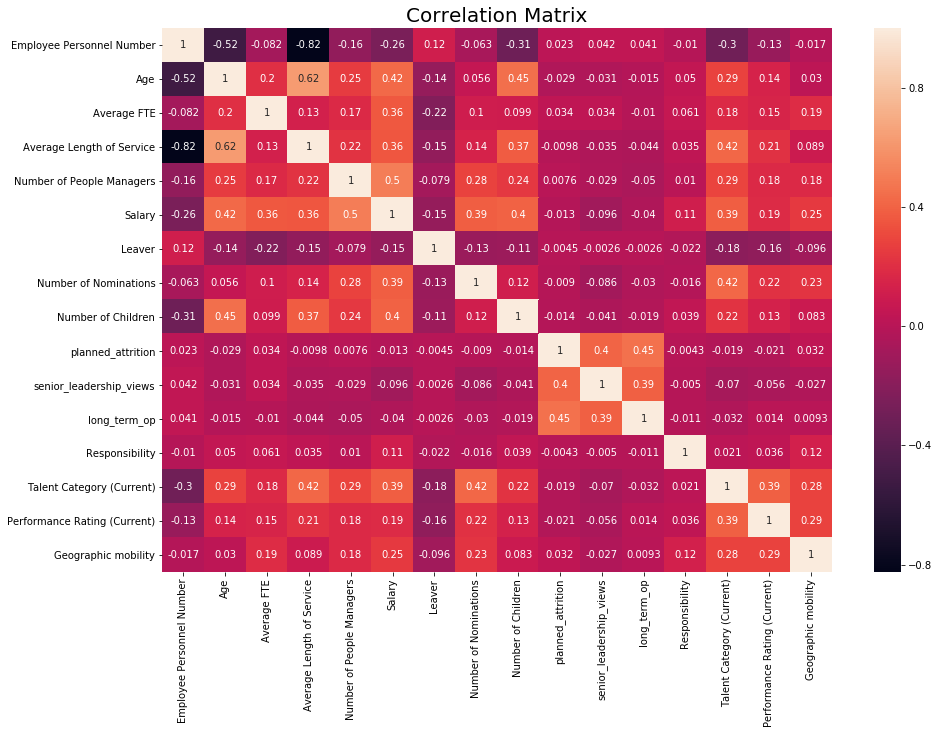

In [44]:
plt.figure(figsize=(15, 10))
sns.heatmap(df_merge2.corr(), annot=True);
plt.title('Correlation Matrix', fontsize=20);

In [122]:
df_merge2.drop(columns = 'Employee Personnel Number', axis = 1 , inplace = True)

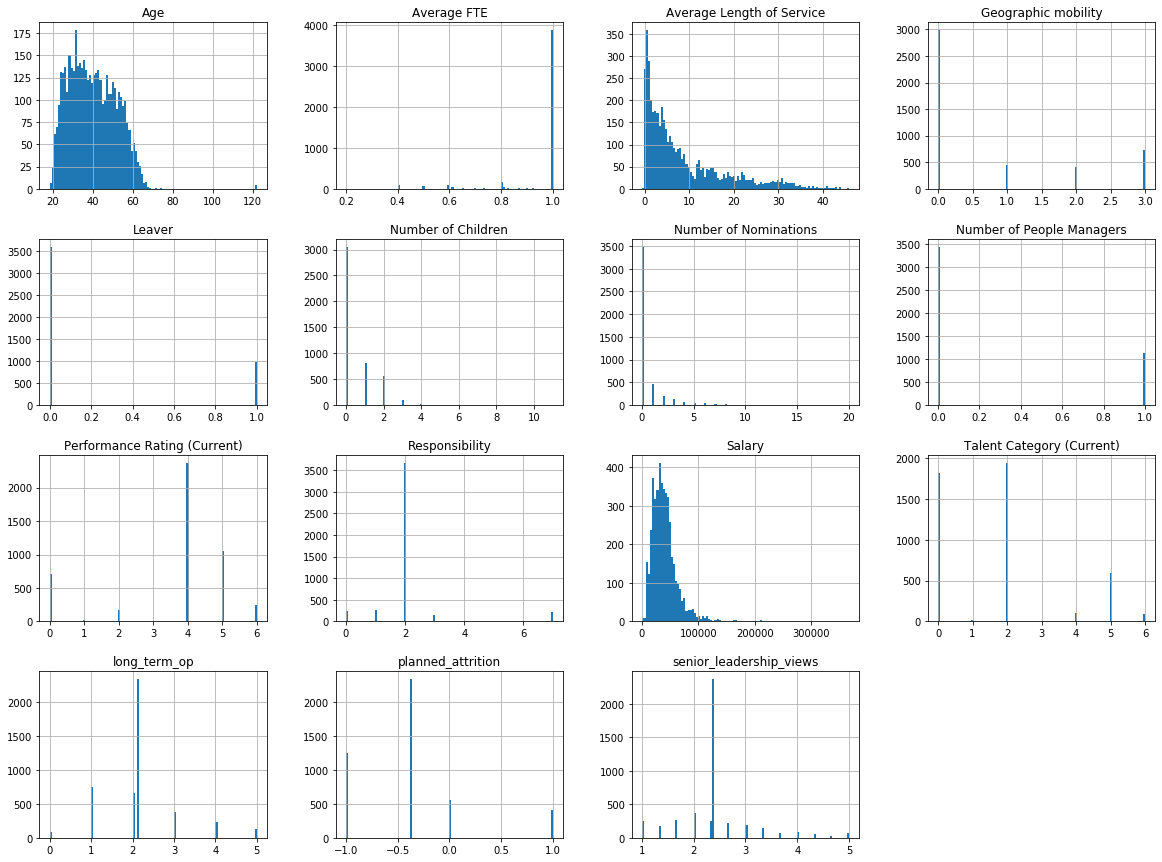

In [123]:
#histograms to understand distributions of numerical values.
df_merge2.hist(bins=100,figsize=(20,15))
plt.show()

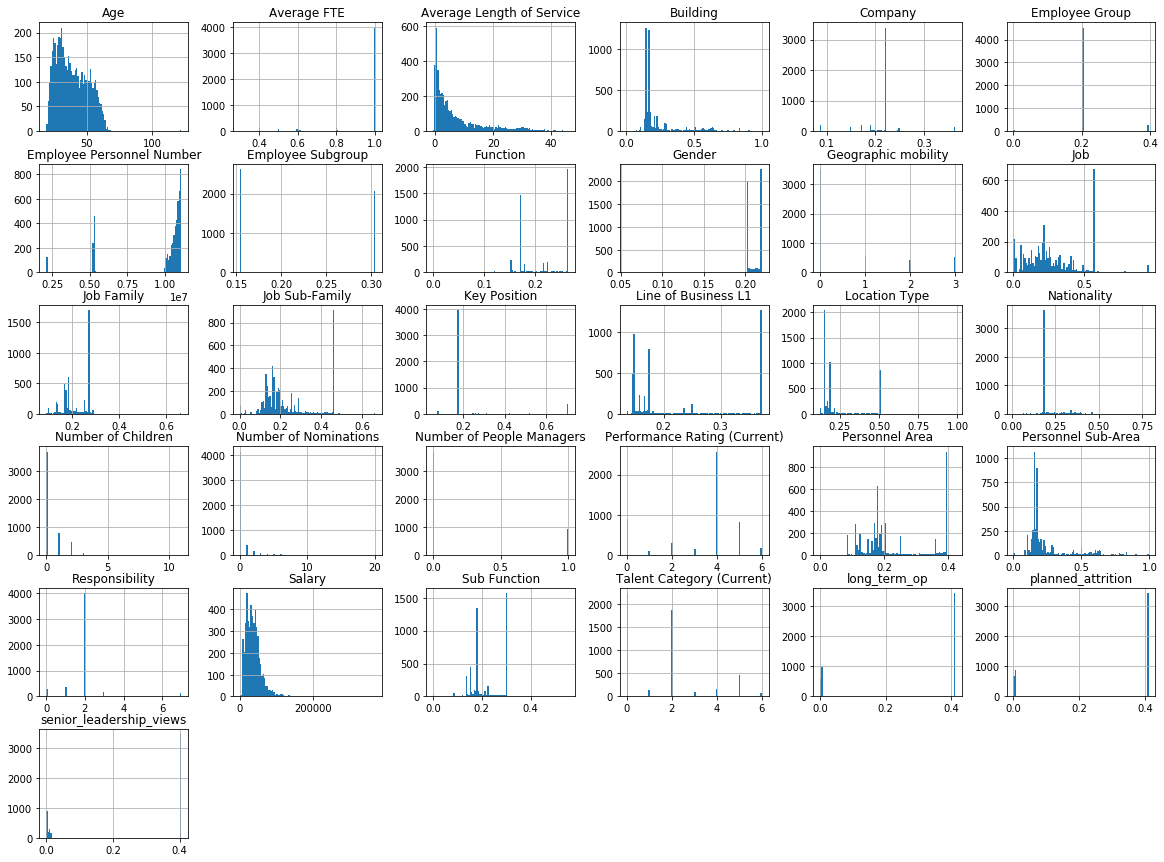

In [124]:
#histograms to understand distributions of numerical values.
X_train.hist(bins=100,figsize=(20,15))
plt.show()

<h3> Feature Importance

In [45]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import numpy as np

In [46]:
dtree = tree.DecisionTreeClassifier(
    #max_depth=3,
    class_weight="balanced",
    min_weight_fraction_leaf=0.01
    )
dtree = dtree.fit(X_train,Y_train)

In [47]:
#plot the importances
importances = dtree.feature_importances_
feat_names = df_merge2.drop(['Leaver'],axis=1).columns


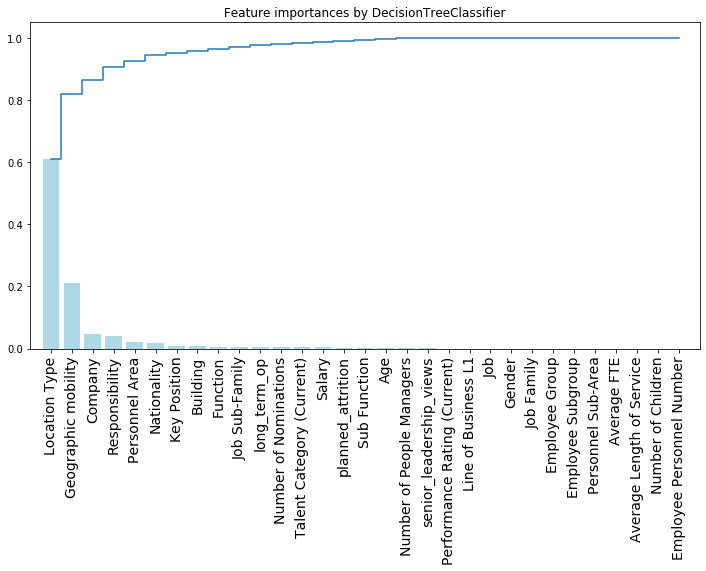

In [125]:
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(12,6))
plt.title("Feature importances by DecisionTreeClassifier")
plt.bar(range(len(indices)), importances[indices], color='lightblue',  align="center")
plt.step(range(len(indices)), np.cumsum(importances[indices]), where='mid', label='Cumulative')
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical',fontsize=14)
plt.xlim([-1, len(indices)])
plt.show()

<h2>Fitting first RF algrithm

In [49]:
rf =RandomForestClassifier(n_estimators=150)
rf.fit(X_train,Y_train.values.ravel())

RandomForestClassifier(n_estimators=150)

In [50]:
Y_pred_rf = rf.predict(X_test)

In [51]:
print(classification_report(Y_test, Y_pred_rf))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90      1075
           1       0.62      0.60      0.61       296

    accuracy                           0.84      1371
   macro avg       0.76      0.75      0.75      1371
weighted avg       0.83      0.84      0.83      1371



In [52]:
print(confusion_matrix(Y_test, Y_pred_rf))

[[967 108]
 [117 179]]


<h3> Fitting XGBoost 

In [53]:
from xgboost import XGBClassifier

In [54]:
xgboost = XGBClassifier()

In [55]:
xgboost.fit(X_train,Y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [56]:
Y_pred_xg = xgboost.predict(X_test)

In [57]:
print(classification_report(Y_test, Y_pred_xg))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89      1075
           1       0.62      0.57      0.60       296

    accuracy                           0.83      1371
   macro avg       0.75      0.74      0.74      1371
weighted avg       0.83      0.83      0.83      1371



In [58]:
print(confusion_matrix(Y_test, Y_pred_xg))

[[970 105]
 [126 170]]


<h3> Fitting SVM

In [59]:
from sklearn.svm import SVC

In [60]:
svm = SVC()
svm.fit(X_train,Y_train.values.ravel())

SVC()

In [61]:
Y_pred_svm = svm.predict(X_test)

In [62]:
print(classification_report(Y_test, Y_pred_svm))

              precision    recall  f1-score   support

           0       0.90      0.29      0.44      1075
           1       0.25      0.88      0.39       296

    accuracy                           0.42      1371
   macro avg       0.58      0.58      0.42      1371
weighted avg       0.76      0.42      0.43      1371



In [63]:
print(confusion_matrix(Y_test, Y_pred_svm))

[[309 766]
 [ 35 261]]


In [64]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

<h3> AdaBoost

In [65]:
adab = AdaBoostClassifier()
adab.fit(X_train,Y_train.values.ravel())

AdaBoostClassifier()

In [66]:
Y_pred_adab = adab.predict(X_test)

In [67]:
print(classification_report(Y_test, Y_pred_adab))

              precision    recall  f1-score   support

           0       0.90      0.86      0.88      1075
           1       0.57      0.66      0.61       296

    accuracy                           0.82      1371
   macro avg       0.74      0.76      0.75      1371
weighted avg       0.83      0.82      0.83      1371



In [68]:
print(confusion_matrix(Y_test, Y_pred_adab))

[[929 146]
 [100 196]]


<h3> GradientBoosting

In [69]:
gradb = GradientBoostingClassifier()
gradb.fit(X_train,Y_train.values.ravel())

GradientBoostingClassifier()

In [70]:
Y_pred_gradb = gradb.predict(X_test)

In [71]:
print(classification_report(Y_test, Y_pred_gradb))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89      1075
           1       0.58      0.68      0.63       296

    accuracy                           0.82      1371
   macro avg       0.74      0.77      0.76      1371
weighted avg       0.84      0.82      0.83      1371



In [72]:
print(confusion_matrix(Y_test, Y_pred_gradb))

[[931 144]
 [ 96 200]]


<h3> ROC curve

In [73]:
from sklearn.metrics import auc, roc_auc_score, roc_curve, recall_score, log_loss

In [74]:
#RF

probs = rf.predict_proba(X_test) # predict probabilities
probs = probs[:, 1] # we will only keep probabilities associated with the employee leaving
rf_opt_roc_auc = roc_auc_score(Y_test, probs) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.896


In [75]:
# XG
probs2 = xgboost.predict_proba(X_test) # predict probabilities
probs2 = probs2[:, 1] # we will only keep probabilities associated with the employee leaving
xg_opt_roc_auc = roc_auc_score(Y_test, probs2) # calculate AUC score using test dataset
print('AUC score: %.3f' % rf_opt_roc_auc)

AUC score: 0.896


In [76]:
# GRAD B
probs3 = gradb.predict_proba(X_test) # predict probabilities
probs3 = probs3[:, 1] # we will only keep probabilities associated with the employee leaving
gradb_opt_roc_auc = roc_auc_score(Y_test, probs3) # calculate AUC score using test dataset
print('AUC score: %.3f' % gradb_opt_roc_auc)

AUC score: 0.898


In [77]:
# ADA Boost
probs4 = adab.predict_proba(X_test) # predict probabilities
probs4 = probs4[:, 1] # we will only keep probabilities associated with the employee leaving
ad_opt_roc_auc = roc_auc_score(Y_test, probs4) # calculate AUC score using test dataset
print('AUC score: %.3f' % ad_opt_roc_auc)

AUC score: 0.825


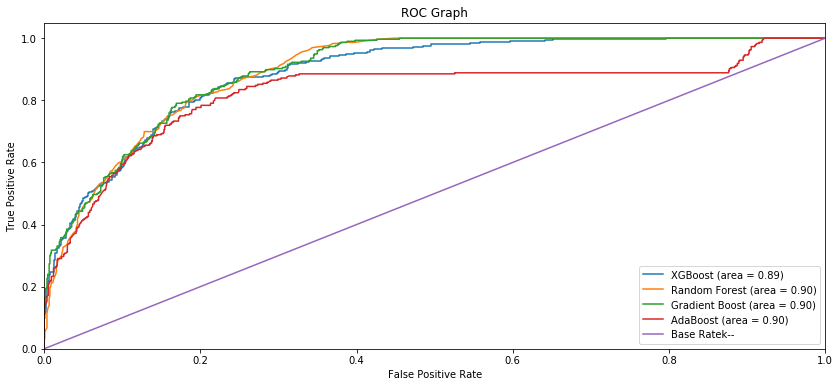

In [78]:
# Create ROC Graph
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(Y_test, xgboost.predict_proba(X_test)[:,1])
rf_fpr, rf_tpr, rf_thresholds = roc_curve(Y_test, rf.predict_proba(X_test)[:,1])
gb_fpr, gb_tpr, gb_thresholds = roc_curve(Y_test, gradb.predict_proba(X_test)[:,1])
ad_fpr, ad_tpr, ad_thresholds = roc_curve(Y_test, adab.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Xgboost ROC
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xg_opt_roc_auc)
# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_opt_roc_auc)
# Plot Random Forest ROC
plt.plot(gb_fpr, gb_tpr, label='Gradient Boost (area = %0.2f)' % gradb_opt_roc_auc)
# Plot Random Forest ROC
plt.plot(ad_fpr, ad_tpr, label='AdaBoost (area = %0.2f)' % gradb_opt_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Graph')
plt.legend(loc="lower right")
plt.show()

<h2> Data Cleansing for new data

In [79]:
test_df = pd.read_csv("fr_headcount_21.csv")

In [80]:
test_df

,Employee Personnel Number,Employee Name,Company,Function,Sub Function,Function Unit,Line of Business L1,Line of Business L2,Job,Position,...,Salary,Key Position,Talent Category (Current),Performance Rating (Current),Number of Nominations,Number of People Managers,Geographic mobility,planned_attrition,senior_leadership_views,long_term_op
0,2100120,Mrs S Gutsell-Forshaw,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,Digital & Social Media,PetCare,Petcare,General Digital/Internet Marketing - M30,Nestle Purina UK&I Head of Digital & CRM,...,94685.00,NOT_KEY,High Achiever,03/02/2021,6,1,Mobile within Market,1.0,2.000000,4.0
1,10172088,Mrs A J Raynos,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,Digital & Social Media,PetCare,Petcare,General Digital/Internet Marketing - P50,CRM lead,...,62061.00,NOT_KEY,High Achiever,03/02/2021,1,0,Not Mobile,-1.0,1.333333,1.0
2,10677562,Mrs C McCarron,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,Digital & Social Media,PetCare,Petcare,Social Media Marketing - P40,Social Media Lead,...,58516.00,NOT_KEY,Critical Resource,02/02/2021,0,0,Not Mobile,1.0,1.666667,2.0
3,11004079,Miss C P Arnold,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,Digital & Social Media,PetCare,Petcare,General Digital/Internet Marketing - P10,Econtent Manager,...,38250.00,NOT_KEY,High Adapter,02/02/2021,1,0,#,NaN,NaN,NaN
4,11063950,Mrs C R Craig-Davies,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,Digital & Social Media,PetCare,Petcare,General Digital/Internet Marketing - P10,Digital Technology Solutions Manager,...,39000.00,NOT_KEY,Too Soon to Rate,02/02/2021,0,0,#,-1.0,1.000000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,10877372,Ms R A Khan,NestlÃ© UK Ltd.,Marketing & Sales,Sales,Commercial Excellence,Confectionery,Confectionery,Long-Term Bus Strategy & Planning - M30,E-business & Media Comms Manager,...,80076.00,NOT_KEY,High Adapter,03/02/2021,9,1,Mobile Globally,1.0,3.000000,4.0
109,10732095,Ms S Kriki,NestlÃ© UK Ltd.,Marketing & Sales,Marketing,Marketing & Consumer Communication,Nutrition,Nutrition,Sales Effectiveness & Analytics - M30,Digital & CRM Lead,...,79590.00,NOT_KEY,High Achiever,03/02/2021,6,1,Not Mobile,0.0,1.000000,1.0
110,10876671,Mr M Chatzitheofylaktou,NestlÃ© UK Ltd.,Marketing & Sales,Marketing,eBusiness,Coffee,Nespresso,E-Commerce/Online Shopping Market - P40,Front End Developer,...,39923.00,NOT_KEY,High Achiever,03/02/2021,2,0,#,-1.0,1.666667,1.0
111,10763992,Mr G A Funga,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,eBusiness,PetCare,Specialist,Account Management/Key Accounts - P30,Business Manager Pureplay,...,56859.09,NOT_KEY,Critical Resource,02/02/2021,0,0,Mobile Globally,-1.0,1.000000,1.0


In [81]:
#getting rid of unneccassary columns
test_df.drop(["Position","Function Unit","Line of Business L2","Employee Name"],axis=1, inplace=True)

In [82]:
mean_planned_attrition=test_df['planned_attrition'].mean()
test_df['planned_attrition'] = test_df['planned_attrition'].fillna(value=mean_planned_attrition)

In [83]:
mean_senior_leadership_views=test_df['senior_leadership_views'].mean()
test_df['senior_leadership_views'] = test_df['senior_leadership_views'].fillna(value=mean_senior_leadership_views)

In [84]:
mean_long_term_op=test_df['long_term_op'].mean()
test_df['long_term_op'] = test_df['long_term_op'].fillna(value=mean_long_term_op)

In [85]:
test_df['Number of People Managers'] = test_df['Number of People Managers'].fillna(0)

In [86]:
encoder_ce2t=ce.TargetEncoder(cols=[ 'Company', 'Function', 'Sub Function',
       'Line of Business L1', 'Job', 'Location Type', 'Building',
        'Job Family', 'Job Sub-Family', 'Employee Group',
       'Employee Subgroup', 'Personnel Area', 'Personnel Sub-Area', 
       'Gender', 'Nationality','Key Position']) 

In [87]:
test_df.columns

Index(['Employee Personnel Number', 'Company', 'Function', 'Sub Function',
       'Line of Business L1', 'Job', 'Location Type', 'Building',
       'Responsibility', 'Job Family', 'Job Sub-Family', 'Employee Group',
       'Employee Subgroup', 'Personnel Area', 'Personnel Sub-Area', 'Age',
       'Gender', 'Nationality', 'Average FTE', 'Average Length of Service',
       'Number of Children', 'Salary', 'Key Position',
       'Talent Category (Current)', 'Performance Rating (Current)',
       'Number of Nominations', 'Number of People Managers',
       'Geographic mobility', 'planned_attrition', 'senior_leadership_views',
       'long_term_op'],
      dtype='object')

In [88]:
ordinalt = ['Responsibility','Talent Category (Current)','Performance Rating (Current)', 'Geographic mobility']

In [89]:
df_ordinalt=test_df[ordinalt]

In [90]:
dicts1t = {'Responsibility': {'Regional': 3,
                             'Above Market':3,
                             'Above Market COC':4,
                             'Zone EMENA':3,
                             'NIM Multi Country': 2,
                             'Global':7,
                             'Global COS':5,
                             'Global COC':6,
                             'Local COC':1,
                             'Local COS': 0},
          'Talent Category (Current)': {'High Professional': 4,
                                        'Resource (High Professional)':4,
                                        'High Adapter': 5,
                                        'High Potential (High Adapter)':5,
                                        'Asset': 6,
                                        'High Achiever': 5,
                                        'High Potential (High Achiever)':5,
                                        'Critical Resource': 2,
                                        'Resource (Critical Resource)':2,
                                        'Unrated': 0,
                                        '#': 0,
                                        'Potential':3,
                                        'Too Soon to Rate': 0,
                                        'Resource (Essential Contributor)':2,
                                        'Concern (Underachiever)':1,
                                        'Essential Contributor': 2,
                                        'Concern': 1},
          'Performance Rating (Current)': {'03/03/2021': 6,
                                           '03/02/2021': 5,
                                           '02/03/2021': 5,
                                           '02/02/2021': 4,
                                           '02/01/2021': 2,
                                           '01/02/2021': 2,
                                           '01/01/2021': 1,
                                           '01/03/2021': 3,
                                           '03/01/2021': 3,
                                           '#': 0},
           'Geographic mobility':{'#':0,
                               'Not Mobile':0,
                               'Mobile within Region/Zone':1,
                               'Mobile within Market':2,
                               'Mobile Globally':3}}

In [91]:
for each in list(df_ordinalt.columns):
    if each !="Employee Personnel Number":
        df_ordinalt.replace({each: dicts1t[each]}, inplace=True)

C:\Users\neveg\Anaconda3\lib\site-packages\pandas\core\generic.py:6702: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


In [92]:
df_ordinalt["Employee Personnel Number"] = test_df["Employee Personnel Number"]

C:\Users\neveg\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [93]:
test_df.drop(['Responsibility','Talent Category (Current)','Performance Rating (Current)','Geographic mobility'],axis = 1, inplace= True)

In [94]:
df_ordinalt

,Responsibility,Talent Category (Current),Performance Rating (Current),Geographic mobility,Employee Personnel Number
0,2,5,5,2,2100120
1,2,5,5,0,10172088
2,2,2,4,0,10677562
3,2,5,4,0,11004079
4,2,0,4,0,11063950
...,...,...,...,...,...
108,2,5,5,3,10877372
109,2,5,5,0,10732095
110,2,5,5,0,10876671
111,2,2,4,3,10763992


In [95]:
df_merge2t = pd.merge(test_df,df_ordinalt)

In [96]:
df_merge2t

,Employee Personnel Number,Company,Function,Sub Function,Line of Business L1,Job,Location Type,Building,Job Family,Job Sub-Family,...,Key Position,Number of Nominations,Number of People Managers,planned_attrition,senior_leadership_views,long_term_op,Responsibility,Talent Category (Current),Performance Rating (Current),Geographic mobility
0,2100120,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,PetCare,General Digital/Internet Marketing - M30,Office,GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,NOT_KEY,6,1,1.000000,2.000000,4.00000,2,5,5,2
1,10172088,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,PetCare,General Digital/Internet Marketing - P50,Office,GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,NOT_KEY,1,0,-1.000000,1.333333,1.00000,2,5,5,0
2,10677562,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,PetCare,Social Media Marketing - P40,Office,GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,NOT_KEY,0,0,1.000000,1.666667,2.00000,2,2,4,0
3,11004079,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,PetCare,General Digital/Internet Marketing - P10,Office,GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,NOT_KEY,1,0,-0.456522,2.033708,2.01087,2,5,4,0
4,11063950,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,PetCare,General Digital/Internet Marketing - P10,Office,GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,NOT_KEY,0,0,-1.000000,1.000000,1.00000,2,0,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,10877372,NestlÃ© UK Ltd.,Marketing & Sales,Sales,Confectionery,Long-Term Bus Strategy & Planning - M30,Office,GB-York Nestle House,General Management,Business Strategy & Planning,...,NOT_KEY,9,1,1.000000,3.000000,4.00000,2,5,5,3
109,10732095,NestlÃ© UK Ltd.,Marketing & Sales,Marketing,Nutrition,Sales Effectiveness & Analytics - M30,Office,GB-Gatwick City Place,"Sales, Marketing & Product Management",Sales Operations/Administration,...,NOT_KEY,6,1,0.000000,1.000000,1.00000,2,5,5,0
110,10876671,NestlÃ© UK Ltd.,Marketing & Sales,Marketing,Coffee,E-Commerce/Online Shopping Market - P40,Office,GB-Gatwick City Place,"Sales, Marketing & Product Management",Product Marketing & Management,...,NOT_KEY,2,0,-1.000000,1.666667,1.00000,2,5,5,0
111,10763992,Nestle Purina UK Comm Ops,Marketing & Sales,Marketing,PetCare,Account Management/Key Accounts - P30,Field Employee,GB-Gatwick City Place,"Sales, Marketing & Product Management",Account & Client Management,...,NOT_KEY,0,0,-1.000000,1.000000,1.00000,2,2,4,3


In [97]:
df_merge2t.columns


Index(['Employee Personnel Number', 'Company', 'Function', 'Sub Function',
       'Line of Business L1', 'Job', 'Location Type', 'Building', 'Job Family',
       'Job Sub-Family', 'Employee Group', 'Employee Subgroup',
       'Personnel Area', 'Personnel Sub-Area', 'Age', 'Gender', 'Nationality',
       'Average FTE', 'Average Length of Service', 'Number of Children',
       'Salary', 'Key Position', 'Number of Nominations',
       'Number of People Managers', 'planned_attrition',
       'senior_leadership_views', 'long_term_op', 'Responsibility',
       'Talent Category (Current)', 'Performance Rating (Current)',
       'Geographic mobility'],
      dtype='object')

In [98]:
encoder_ce2t=ce.TargetEncoder(cols=[ 'Company', 'Function', 
       'Line of Business L1', 'Job', 'Location Type', 'Building',
        'Job Family', 'Job Sub-Family', 'Employee Group',
       'Employee Subgroup', 'Personnel Area', 'Personnel Sub-Area', 
       'Gender', 'Nationality','Key Position']) 

In [99]:
df_merge2t.columns

Index(['Employee Personnel Number', 'Company', 'Function', 'Sub Function',
       'Line of Business L1', 'Job', 'Location Type', 'Building', 'Job Family',
       'Job Sub-Family', 'Employee Group', 'Employee Subgroup',
       'Personnel Area', 'Personnel Sub-Area', 'Age', 'Gender', 'Nationality',
       'Average FTE', 'Average Length of Service', 'Number of Children',
       'Salary', 'Key Position', 'Number of Nominations',
       'Number of People Managers', 'planned_attrition',
       'senior_leadership_views', 'long_term_op', 'Responsibility',
       'Talent Category (Current)', 'Performance Rating (Current)',
       'Geographic mobility'],
      dtype='object')

In [100]:
df_merge2.columns

Index(['Employee Personnel Number', 'Company', 'Function', 'Sub Function',
       'Line of Business L1', 'Job', 'Location Type', 'Building', 'Job Family',
       'Job Sub-Family', 'Employee Group', 'Employee Subgroup',
       'Personnel Area', 'Personnel Sub-Area', 'Age', 'Gender', 'Nationality',
       'Average FTE', 'Average Length of Service', 'Number of People Managers',
       'Salary', 'Leaver', 'Key Position', 'Number of Nominations',
       'Number of Children', 'planned_attrition', 'senior_leadership_views',
       'long_term_op', 'Responsibility', 'Talent Category (Current)',
       'Performance Rating (Current)', 'Geographic mobility'],
      dtype='object')

In [101]:
X_test_new = encoder_ce2.transform(df_merge2t) 

<h2> predict probs for new set

In [102]:

df_X_Test1 = pd.DataFrame(X_test_new["Employee Personnel Number"])

In [115]:
df_prob_pred1 = pd.DataFrame(rf.predict_proba(X_test_new), columns={"Pred_Active","Pred_Leavers"})

C:\Users\neveg\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [116]:
df_prob_pred1 

,Pred_Active,Pred_Leavers
0,0.446667,0.553333
1,0.633333,0.366667
2,0.660000,0.340000
3,0.666667,0.333333
4,0.686667,0.313333
...,...,...
108,0.280000,0.720000
109,0.493333,0.506667
110,0.506667,0.493333
111,0.446667,0.553333


In [117]:
df_X_Test1["Active"] = df_prob_pred1["Pred_Active"].values

In [118]:
df_X_Test1["Leavers"] = df_prob_pred1["Pred_Leavers"].values

In [119]:
df_X_Test1

,Employee Personnel Number,Active,Leavers
0,2100120,0.446667,0.553333
1,10172088,0.633333,0.366667
2,10677562,0.660000,0.340000
3,11004079,0.666667,0.333333
4,11063950,0.686667,0.313333
...,...,...,...
108,10877372,0.280000,0.720000
109,10732095,0.493333,0.506667
110,10876671,0.506667,0.493333
111,10763992,0.446667,0.553333


In [120]:
df_X_Test1.to_csv('final_fr_probs2.csv')

In [67]:
ebus_predict = rf.predict(X_test_new)

C:\Users\neveg\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [68]:
ebus_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0], dtype=uint8)

In [69]:
df_pred_number = pd.DataFrame(X_test_new["Employee Personnel Number"])

In [70]:
df_predictions = pd.DataFrame(rf.predict(X_test_new), columns={"Leaver"})

C:\Users\neveg\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


In [71]:
df_pred_number['Predictions'] = df_predictions['Leaver']

In [72]:
df_pred_number

,Employee Personnel Number,Predictions
0,2100120,0
1,10172088,0
2,10677562,0
3,11004079,0
4,11063950,0
...,...,...
108,10877372,0
109,10732095,1
110,10876671,0
111,10763992,0


In [73]:
df_pred_number.to_csv('Predictions Number.csv')

<h2> Predict Probs for RandomForest

In [74]:

df_X_Test = pd.DataFrame(X_test["Employee Personnel Number"])

In [75]:
#X_test.drop(["Employee Personnel Number"], axis=1, inplace=True)

In [76]:

#X_train.drop(["Employee Personnel Number"], axis=1, inplace=True)

In [77]:
df_X_Test.columns

Index(['Employee Personnel Number'], dtype='object')

In [78]:
X_test.columns

Index(['Location Type', 'Number of Children', 'Job Sub-Family',
       'Average Length of Service', 'Gender', 'Job Family', 'Responsibility',
       'Employee Personnel Number', 'Performance Rating (Current)', 'Company',
       'Job', 'Talent Category (Current)', 'Key Position', 'Sub Function',
       'Age', 'Line of Business L1', 'Number of People Managers',
       'Number of Nominations', 'Salary', 'Employee Subgroup', 'Average FTE',
       'Personnel Area', 'Nationality', 'Function', 'Personnel Sub-Area',
       'Employee Group', 'Building'],
      dtype='object')

In [73]:
df_prob_pred = pd.DataFrame(rf.predict_proba(X_test), columns={"Pred_Leavers","Pred_Active"})

In [74]:
df_prob_pred 

,Pred_Leavers,Pred_Active
0,0.133333,0.866667
1,0.113333,0.886667
2,0.213333,0.786667
3,0.126667,0.873333
4,0.733333,0.266667
5,0.353333,0.646667
6,0.140000,0.860000
7,0.066667,0.933333
8,0.000000,1.000000
9,0.386667,0.613333


In [75]:
df_X_Test["Active"] = df_prob_pred["Pred_Active"].values

In [76]:
df_X_Test["Leavers"] = df_prob_pred["Pred_Leavers"].values

In [77]:
df_X_Test["Y_test"] = Y_test.values

In [78]:
df_X_Test["Y_pred"] = Y_pred_rf 

In [79]:
probabilites = df_X_Test[df_X_Test["Y_pred"]==0]

In [80]:
probabilites

,Employee Personnel Number,Active,Leavers,Y_test,Y_pred
2017,5234600,0.266667,0.733333,0,0
1751,2104039,0.473333,0.526667,1,0
4110,10794834,0.500000,0.500000,1,0
938,11033090,0.426667,0.573333,1,0
1571,10549459,0.426667,0.573333,1,0
6566,11023169,0.106667,0.893333,1,0
5684,10970902,0.133333,0.866667,0,0
4494,10860758,0.493333,0.506667,1,0
5098,11044493,0.240000,0.760000,1,0
7649,5254187,0.440000,0.560000,0,0


In [81]:
probabilites.to_csv('flight_risk_probabilities3.csv')

In [73]:
print(confusion_matrix(Y_test, Y_pred_rf))

[[ 134  258]
 [ 112 1958]]


In [98]:
!pip install xgboost

You should consider upgrading via the 'c:\users\neveg\anaconda3\python.exe -m pip install --upgrade pip' command.


In [76]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
models = []

models.append(("Logistic Regression:",LogisticRegression()))
models.append(("Naive Bayes:",GaussianNB()))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))
models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear")))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("Random Forest:",RandomForestClassifier(n_estimators=7)))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("MLP:",MLPClassifier(hidden_layer_sizes=(45,30,15),solver='sgd',learning_rate_init=0.01,max_iter=500)))
models.append(("AdaBoostClassifier:",AdaBoostClassifier()))
models.append(("GradientBoostingClassifier:",GradientBoostingClassifier()))

In [100]:
models

[('Logistic Regression:', LogisticRegression()),
 ('Naive Bayes:', GaussianNB()),
 ('K-Nearest Neighbour:', KNeighborsClassifier(n_neighbors=3)),
 ('Decision Tree:', DecisionTreeClassifier()),
 ('Support Vector Machine-linear:', SVC(kernel='linear')),
 ('Support Vector Machine-rbf:', SVC()),
 ('Random Forest:', RandomForestClassifier(n_estimators=7)),
 ('eXtreme Gradient Boost:',
  XGBClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bynode=None,
                colsample_bytree=None, early_stopping_rounds=None,
                enable_categorical=False, eval_metric=None, gamma=None,
                gpu_id=None, grow_policy=None, importance_type=None,
                interaction_constraints=None, learning_rate=None, max_bin=None,
                max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
                max_leaves=None, min_child_weight=None, missing=nan,
                monotone_constraints=None, n_estimators=1

In [75]:
X_train.head(5)

,Nationality,Key Position,Job Family,Gender,Average FTE,Sub Function,Performance Rating (Current),Function,Average Length of Service,Job,...,Number of Nominations,Talent Category (Current),Personnel Area,Personnel Sub-Area,Employee Subgroup,Number of People Managers,Number of Children,Line of Business L1,Salary,Employee Group
0,0.847482,0.818467,0.838926,0.848572,1.0,0.862319,4,0.862319,9.87,0.833333,...,2,5,0.876923,0.856404,0.846235,0.0,0,0.883677,33660.0,0.838289
1,0.847482,0.843053,0.901009,0.848572,1.0,0.882089,0,0.874357,12.86,0.898374,...,0,0,0.887807,0.874286,0.895482,0.0,0,0.883677,30585.0,0.838289
2,0.523810,0.818467,0.838926,0.797403,1.0,0.862319,4,0.862319,1.52,0.818182,...,0,0,0.876923,0.856404,0.846235,0.0,0,0.883677,38000.0,0.838289
3,0.847482,0.843053,0.838926,0.797403,0.6,0.882089,4,0.874357,7.43,0.826087,...,0,2,0.887807,0.884354,0.846235,0.0,2,0.883677,23954.0,0.838289
4,0.847482,0.818467,0.705318,0.797403,1.0,0.688761,4,0.718657,1.87,0.800566,...,0,0,0.729167,0.727273,0.846235,0.0,0,0.730570,40800.0,0.838289


In [ ]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=10)
    cv_result = cross_val_score(model,X_train,Y_train.values.ravel(), cv = kfold,scoring = "f1")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

<h2> Fitting XGBoost

In [76]:
xgboost = XGBClassifier()

In [77]:
xgboost.fit(X_train,Y_train.values.ravel())

C:\Anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[00:19:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [78]:
Y_pred_xg = xgboost.predict(X_test)

In [79]:
print(classification_report(Y_test, Y_pred_xg))

              precision    recall  f1-score   support

           0       0.51      0.36      0.42       392
           1       0.88      0.94      0.91      2070

    accuracy                           0.84      2462
   macro avg       0.70      0.65      0.67      2462
weighted avg       0.83      0.84      0.83      2462



<h2> Testing with normalised dataframe RF

In [114]:
norm_x_train=(X_train-X_train.mean())/X_train.std()

In [115]:
norm_x_test=(X_test-X_test.mean())/X_test.std()

In [116]:
rf_normalised =RandomForestClassifier(n_estimators=50)
rf_normalised.fit(norm_x_train,Y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

In [117]:
Y_pred_rf_norm = rf_normalised.predict(norm_x_test)

In [118]:
print(classification_report(Y_test, Y_pred_rf_norm))

              precision    recall  f1-score   support

           0       0.90      0.06      0.11      2070
           1       0.16      0.96      0.28       392

    accuracy                           0.20      2462
   macro avg       0.53      0.51      0.20      2462
weighted avg       0.78      0.20      0.14      2462



In [119]:
print(confusion_matrix(Y_test, Y_pred_rf_norm))

[[ 124 1946]
 [  14  378]]


<H2> Using MinMaxScaler() to transform the data

In [120]:
from sklearn.preprocessing import MinMaxScaler

In [121]:
scaler = MinMaxScaler()

In [122]:
scaled_x_train = scaler.fit_transform(X_train)

In [123]:
scaled_x_test = scaler.transform(X_test)

<h2> Testing with scaled data

In [124]:
rf_scaled = RandomForestClassifier(n_estimators=50)
rf_scaled.fit(scaled_x_train,Y_train.values.ravel())

RandomForestClassifier(n_estimators=50)

In [125]:
Y_pred_rf_scaled = rf_scaled.predict(norm_x_test)

C:\Users\neveg\Anaconda3\lib\site-packages\sklearn\base.py:444: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


In [126]:
print(classification_report(Y_test, Y_pred_rf_scaled))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2070
           1       0.51      0.23      0.31       392

    accuracy                           0.84      2462
   macro avg       0.69      0.59      0.61      2462
weighted avg       0.81      0.84      0.82      2462



<h2> Predict Proba for XGboost

In [93]:
df_pred=pd.DataFrame(xgboost.predict_proba(X_test),columns=["Activate","Leaver"])
df_pred

,Activate,Leaver
0,0.253712,0.746288
1,0.159485,0.840515
2,0.130267,0.869733
3,0.363411,0.636589
4,0.816426,0.183574
5,0.263886,0.736114
6,0.002127,0.997873
7,0.023160,0.976840
8,0.007293,0.992707
9,0.215725,0.784275


In [94]:
df_X_Test["Activate"]=df_pred["Activate"].values
df_X_Test["Leaver"]=df_pred["Leaver"].values
df_X_Test["Y_test"]= Y_test

In [95]:
df_X_Test

,Employee Personnel Number,Active,Leavers,Y_test,Y_pred,Activate,Leaver
528,10905399,0.820000,0.180000,1,1,0.253712,0.746288
3030,10037755,0.900000,0.100000,0,1,0.159485,0.840515
4324,5289249,0.746667,0.253333,1,1,0.130267,0.869733
1540,11007058,0.880000,0.120000,1,1,0.363411,0.636589
2017,5234600,0.306667,0.693333,0,0,0.816426,0.183574
7787,10870660,0.673333,0.326667,1,1,0.263886,0.736114
6604,5250758,0.840000,0.160000,1,1,0.002127,0.997873
6928,10501301,0.953333,0.046667,1,1,0.023160,0.976840
3471,10911007,0.993333,0.006667,1,1,0.007293,0.992707
3277,10852501,0.566667,0.433333,1,1,0.215725,0.784275


In [96]:
Y_test

,Not Leaver
528,1
3030,0
4324,1
1540,1
2017,0
7787,1
6604,1
6928,1
3471,1
3277,1


In [97]:
pd.DataFrame(xgboost.predict(X_test))

,0
0,1
1,1
2,1
3,1
4,0
5,1
6,1
7,1
8,1
9,1
